# Curso de Optimización (DEMAT)
## Tarea 8

| Descripción:                         | Fechas               |
|--------------------------------------|----------------------|
| Fecha de publicación del documento:  | **Abril 29, 2025**   |
| Fecha límite de entrega de la tarea: | **Mayo  11, 2025**   |


### Indicaciones

Puede escribir el código de los algoritmos que se piden en una
celda de este notebook o si lo prefiere, escribir las funciones
en un archivo `.py` independiente e importar la funciones para
usarlas en este notebook. Lo importante es que en el notebook
aparezcan los resultados de la pruebas realizadas y que:

- Si se requieren otros archivos para poder reproducir los resultados,
  para mandar la tarea cree un archivo ZIP en el que incluya
  el notebook y los archivos adicionales.
- Si todos los códigos para que se requieren para reproducir los
  resultados están en el notebook, no hace falta comprimirlo
  y puede anexar sólo el notebook en la tarea del Classroom.
- Exportar el notebook a un archivo PDF y anexarlo en la tarea del
  Classroom como un archivo independiente.
  **No lo incluya dentro del ZIP**, porque la idea que lo pueda accesar
  directamente para poner anotaciones y la calificación de cada ejercicio.

---

## Resuelto por Cesar Amilkar Rivera Covarrubias

In [2]:
from funciones_prop import *

## Ejercicio 1. Mínimos cuadrados lineales (2 puntos)

Encontrar los coeficientes $c_0, c_1, ...$ de un polinomio de dos variables
$p_n(x_1, x_2)$ de grado $n$ que resuelve el problema de mínimos
cuadrados lineales:

$$ \min_{c_i} \sum_{i=1}^m [p_n(x_{1i}, x_{2i}) - y_i]^2.  $$

El conjunto de datos $\{ (x_{11}, x_{21}, y_1), (x_{12}, x_{22}, y_2),
..., (x_{1m}, x_{2m}, y_m)\}$ está generado como se muestra en el
siguiente código. Las coordenadas de las variables $x_1$ y $x_2$
están almacenadas como columnas en el arreglo $\mathbf{X}$ y los
valores $y_i$ se almacenan en el arreglo $\mathbf{y}$:

$$ \mathbf{X} = \begin{bmatrix} x_{11} & x_{21} \\
x_{12} & x_{22} \\
\vdots & \vdots \\
x_{1m} & x_{2m}
\end{bmatrix}, \quad
\mathbf{y} = \begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_m
\end{pmatrix}.
$$


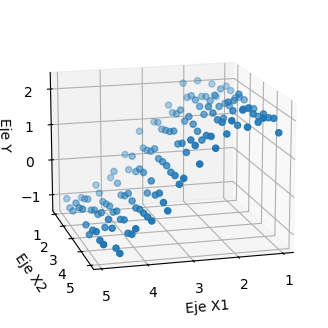

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Generate the true function and the data set
np.random.seed(42)
true_function = lambda x: 1.5*np.sin(x[0]) + 0.5

x1 = np.array([i*np.pi/180 for i in range(60,300,20)])
x2 = np.linspace(1,5,len(x1))
x1_grid,x2_grid = np.meshgrid(x1,x2)
m  = len(x1)*len(x2)
X  = np.zeros((m,2))
X[:,0]  = x1_grid.flatten()
X[:,1]  = x2_grid.flatten()

y = np.zeros(m)
for i,x1x2 in enumerate(X):
    y[i] = true_function(x1x2)
y += np.random.normal(0, 0.15, m)

# Grafica del conjunto de datos
fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], y)
ax.set_xlabel('Eje X1')
ax.set_ylabel('Eje X2')
ax.set_zlabel('Eje Y')
ax.view_init(15, 75)

El polinomio $p_n(x_1, x_2)$ de grado $n$ es de la forma

$$ p_n(x_1, x_2) = \sum_{i_1 =0}^n
\sum_{i_2=0}^{n-i_1}  c_i x_1^{i_1}x_2^{i_2},$$

es decir, el polinomio está formado por los términos $c_i x_1^{i_1}x_2^{i_2}$,
donde $i$ indexa cada término.

Ejemplos:

$$ p_1(x_1, x_2) = c_0 + c_1 x_1 + c_2 x_2$$

$$ p_2(x_1, x_2) = c_0 + c_1 x_1 + c_2 x_2 + c_3x_1x_2 + c_4 x_1^2 +
c_5 x_2^2$$

Entonces

$$  \sum_{i=1}^m [p_n(x_{1i}, x_{2i}) - y_i]^2
=  (\mathbf{X}_n \mathbf{c}-\mathbf{y})^\top (\mathbf{X}_n \mathbf{c}-\mathbf{y})   $$

donde $\mathbf{c}= (c_0, c_1, ..., c_r)^\top$ es el vector de coeficientes
del polinomio, $r+1$ es la cantidad de coeficientes y $\mathbf{X}_n$
es la matriz que tiene en cada columna los valores

$$\begin{array}{c}
x_{11}^{i_1}x_{21}^{i_2} \\  
x_{12}^{i_1}x_{22}^{i_2} \\  
\vdots \\
x_{1m}^{i_1}x_{2m}^{i_2}
\end{array}$$

Para generar generar la matriz $\mathbf{X}_n$  se puede usar la
clase `PolynomialFeatures`. Por ejemplo, crear la matriz $\mathbf{X}_3$
asociada al polinomio de grado 3:   

In [4]:
from sklearn.preprocessing import PolynomialFeatures

n    = 3
poly = PolynomialFeatures(n, include_bias=True)
Xn   = poly.fit_transform(X)
print('Tamaño de la matriz Xn:', Xn.shape)

Tamaño de la matriz Xn: (144, 10)


De acuerdo con la teoría, la solución $\mathbf{c}$ del problema
de mínimos cuadrados se obtiene resolviendo el sistema de ecuaciones

$$ \mathbf{X}_n^\top\mathbf{X}_n\mathbf{c} = \mathbf{X}_n^\top\mathbf{y}$$

Dado el vector $\mathbf{c}$, los valores del polinomio en los
puntos $(x_{1i}, x_{2i})$ están dados por

$$ \mathbf{y}_{pred} = \mathbf{X}_n\mathbf{c},$$

y la raíz del error cuadrático medio entre los valores verdaderos
y los que predice el modelo está dado por

$$
RMSE = \sqrt{\frac{(\mathbf{y}-\mathbf{y}_{pred})^\top(\mathbf{y}-\mathbf{y}_{pred})}{m}}.
$$


1. Escriba una función que reciba como argumentos la matriz  
   $\mathbf{X}$, el vector $\mathbf{y}$ y el grado $n$ del polinomio.
   La función devuelve el vector de coeficientes $\mathbf{c}$
   del polinomio $p_n(x_1,x_2)$ y el número de condición
   de la matriz $\mathbf{X}_n$.
2. Pruebe la función para $n=1,3, 5$ y $7$.
   En cada caso calcule el vector $\mathbf{y}_{pred}$,  el RMSE e imprima
   los valores:
   
- El grado $n$ del polinomio
- El número de condición de la matriz $\mathbf{X}_n$
- El RMSE

Puede usar el siguiente código para graficar la superficie
del polinomio usando los valores que toma en los nodos de la
retícula:

```
Y_grid  = y_pred.reshape( len(x1), len(x2) )
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.plot_surface(x1_grid, x2_grid, Y_grid, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.scatter3D(X[:,0], X[:,1], y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.view_init(15, 75)
```

### Solución:

In [5]:

def solve_sistema (X, y, n):

    matriz = np.dot(X.T, X)
    vector = np.dot(X.T, y) 

    return np.linalg.solve(matriz, vector), np.linalg.cond(X)

def RMSE (y, y_pred, m):
    return np.sqrt(np.dot(y - y_pred, y - y_pred)/m)


def gen_Xn(X, n):
    poly = PolynomialFeatures(n, include_bias=True)
    Xn   = poly.fit_transform(X)
    return Xn

    
def graficar(y_pred, n):
    Y_grid  = y_pred.reshape( len(x1), len(x2) )
    fig = plt.figure(figsize=(8,6))
    ax = plt.axes(projection='3d')
    ax.plot_surface(x1_grid, x2_grid, Y_grid, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
    ax.scatter3D(X[:,0], X[:,1], y)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Y')
    ax.view_init(15, 75)

n:  1
Numero de condicion de Xn:  16.4623
RMSE:  0.3195
n:  3
Numero de condicion de Xn:  3414.0873
RMSE:  0.1432
n:  5
Numero de condicion de Xn:  873489.0526
RMSE:  0.1321
n:  7
Numero de condicion de Xn:  292966221.0125
RMSE:  0.1295


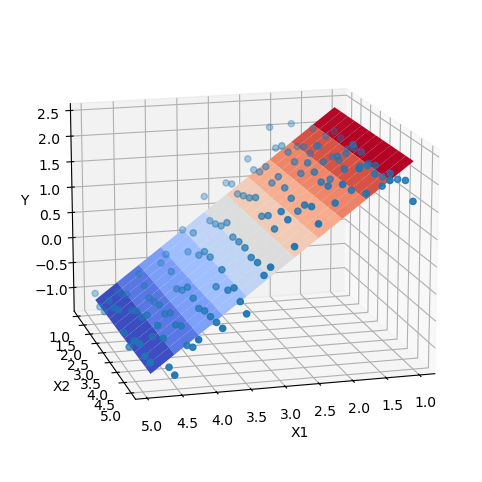

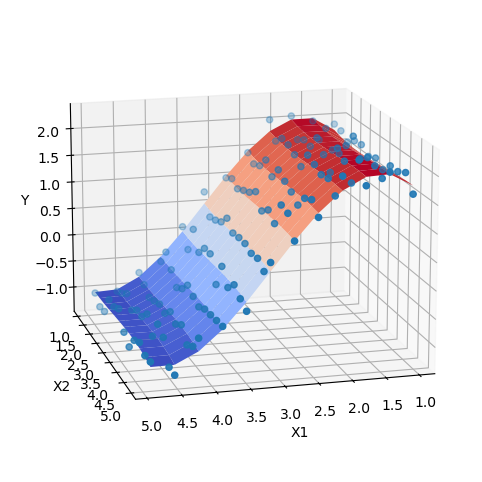

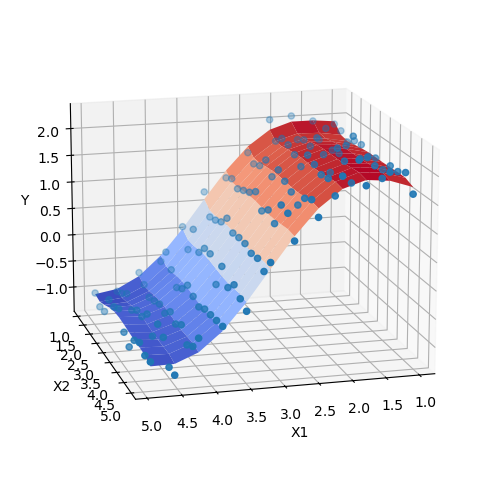

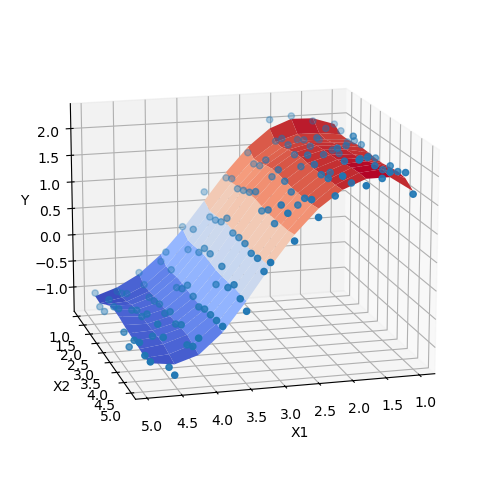

In [86]:
## Para n=1

n=1
Xn = gen_Xn(X, n)
c, condicion = solve_sistema(Xn, y, n)

y_pred = np.dot(Xn, c)

rsme = RMSE(y, y_pred, m)

print("n: ", n) 
print(f"Numero de condicion de Xn: {condicion: .4f}")
print(f"RMSE: {rsme: .4f}")

graficar(y_pred, n)
n=3
Xn = gen_Xn(X, n)
c, condicion = solve_sistema(Xn, y, n)

y_pred = np.dot(Xn, c)

rsme = RMSE(y, y_pred, m)

print("n: ", n) 
print(f"Numero de condicion de Xn: {condicion: .4f}")
print(f"RMSE: {rsme: .4f}")

graficar(y_pred, n)

n=5
Xn = gen_Xn(X, n)
c, condicion = solve_sistema(Xn, y, n)

y_pred = np.dot(Xn, c)

rsme = RMSE(y, y_pred, m)

print("n: ", n) 
print(f"Numero de condicion de Xn: {condicion: .4f}")
print(f"RMSE: {rsme: .4f}")

graficar(y_pred, n)

n=7
Xn = gen_Xn(X, n)
c, condicion = solve_sistema(Xn, y, n)

y_pred = np.dot(Xn, c)

rsme = RMSE(y, y_pred, m)

print("n: ", n) 
print(f"Numero de condicion de Xn: {condicion: .4f}")
print(f"RMSE: {rsme: .4f}")

graficar(y_pred, n)




```



```
---

## Ejercicio 2. Mínimos cuadrados no lineales (3 puntos)

Usando los datos del Ejercicio 1, calcular los coeficientes
$\mathbf{c} = (c_0, c_1, c_2,c_3)^\top$ del modelo

$$ f(\mathbf{x}; \mathbf{c}) = f(x_1, x_2; \mathbf{c}) = c_0 + c1\sin(c_2x_1)\cos(c_3x_2) $$

resolviendo el problema de mínimos cuadrados no lineales

$$ \min_{\mathbf{c}} \; \sum_{i=1}^m  r_i(\mathbf{c})^2 $$

donde $r_i(\mathbf{c})= f(x_{1i}, x_{2i}, \mathbf{c}) - y_i$ son las
componentes del vector de residuales

$$ r(\mathbf{c}) = \begin{pmatrix}
r_1(\mathbf{c}) \\
r_2(\mathbf{c}) \\
\vdots \\
r_m(\mathbf{c})
\end{pmatrix}.
$$

1. Escriba el código de la función que evalúa el modelo $f(\mathbf{x}; \mathbf{c})$.
2. Escriba el código de la función que evalúa el residual $r(\mathbf{c})$
   para el conjunto de datos del Ejercicio 1.
3. Escriba el código de la función que calcula el valor de
   la matriz Jacobiana $\mathbf{J}$ del  residual $r(\mathbf{c})$,
   calculando las derivadas parciales de los residuales de manera
   analítica.
4. Escriba la función que implementa el algoritmo de Levenberg-Marquart
   para resolver el problema de mínimos cuadrados no lineales
   (Algoritmo 1 de la Clase 19).
5. Pruebe el algoritmo usando:

- El punto inicial $\mathbf{c}_0 = (1.0, 1.0, 0.75, 0.5)^\top$.
- $\mu_{ref} = 0.001$.
- La tolerancia $\tau = \sqrt{m}\epsilon_m^{1/3}$.
- El máximo número de iteraciones $N=200$.

Imprima el vector $\mathbf{c}_k$, el valor $f_k$, el número de iteraciones
$k$ y la variable $res$ que indica si se cumplió la tolerancia antes de
terminar las iteraciones.

Además calcule el vector $\mathbf{y}_{pred}$, que tiene los valores
que predice el modelo en los nodos $(x_{1i}, x_{2i})$ de la retícula,
calcule el RMSE e imprima su valor.

También grafique la superficie del modelo y los datos para
observar el ajuste que hace el modelo a los datos.

6. Repita la prueba usado como punto inicial
   $\mathbf{c}_0 = (1.0, 0.5, 0.75, 0.5)^\top$.

7. Agregue un comentario sobre los resultados obtenidos con respecto a
   los resultados en el Ejercicio 1.


### Solución:

In [51]:
from numpy import sin, cos

def mod_f (x, c):
    if len(x) != 2:
        raise ValueError("Error en la dimension del vector x")

    if len(c) != 4: 
        raise ValueError("Error en la dimension del vector c") 

    return c[0] + c[1] * sin(c[2]*x[0]) * cos(c[3]*x[1])

def eval_rc(c):
    sol = []
    for (x1, x2), yk in zip(X, y):
        sol.append(mod_f([x1, x2], c) - yk)

    return np.array(sol)

Calculemos las derivadas parciales de $r_i(C)$

Respecto a $c_0$. 
$$
\begin{align*}
\partial_{c_0} \left (  f(x_{1i}, x_{2i}, \mathbf{c}) - y_i \right )
&= \partial_{c_0} \left (  c_0 + c1\sin(c_2x_1)\cos(c_3x_2)  - y_i \right ) \\ 
&= 1 
\end{align*}
$$

Con $c_1$. 

$$
\begin{align*}
\partial_{c_1} \left (  c_0 + c1\sin(c_2x_1)\cos(c_3x_2)  - y_i \right )
&=  c_1\sin(c_2x_1) \cos(c_3 x_2) 
\end{align*}
$$

Para $c_2$. 
$$
\begin{align*}
\partial_{c_2} \left ( c_0 + c1\sin(c_2x_1)\cos(c_3x_2)  - y_i \right  ) 
&= c1 x_1 \cos(c_2 x_1) \cos(c_3x_2) 
\end{align*}
$$

Concluyendo con $c_3$. 
$$
\begin{align*}
\partial_{c_3} \left ( c_0 + c1\sin(c_2x_1)\cos(c_3x_2)  - y_i \right  ) 
&= -c1 x_2 \sin(c_2 x_1) \sin(c_3x_2) 
\end{align*}
$$



In [73]:
def der_r (c):
    sol = []
    for x1, x2 in X:
        jacob_i = []
        jacob_i.append(1)
        jacob_i.append(c[1] * np.sin(c[2] * x1) * np.cos(c[3]*x2))
        jacob_i.append(c[1] * x1 *  np.cos(c[2]*x1) * np.cos(c[3]*x2))
        jacob_i.append(-c[1] * x2 * np.sin(c[2]*x1) * np.sin(c[3]*x2))
    
        sol.append(jacob_i)

    return np.array(sol)


def lev_marq (fun_res, fun_jac, z0, N, mu, tol):
    if mu <= 0: 
        raise ValueError("Valor incorrecto de mu")

    if tol <= 0: 
        raise ValueError("Valor incorrecto para la tolerancia")


    zk =  z0
    res = 0 
    mat_id = np.eye(len(zk))

    Rk = np.array(fun_res(zk))
    Jk = np.array(fun_jac(zk))
    fk = 0.5 * np.dot(Rk.T,  Rk)
    A = np.dot(Jk.T, Jk)
    g = np.dot(Jk.T, Rk)


    mu = min(mu, max(np.diag(A)))


    flag = False 

    for k in range(N):
        pk = np.linalg.solve((A + mu * mat_id), -g)


        if np.linalg.norm(pk) < tol:
            flag = True
            break

        zk1 = zk + pk
        Rk1 = fun_res(zk1)
        fk1 = 0.5 * np.dot(Rk1.T, Rk1)
         
        rho = (fk - fk1)/(np.dot(np.dot(pk.T, Jk.T), Rk) + 0.5 * mu * np.dot(pk.T, pk))

        if rho < 0.25: 
            mu = 2 * mu
        elif rho > 0.75:
            mu = mu/3


        Rk = Rk1 
        fk = fk1 
        zk = zk1

        Jk = fun_jac(zk1)
        A = np.dot(Jk.T, Jk)
        g = np.dot(Jk.T, Rk)

    return zk, fk, k, flag




c0:  (1.0, 1.0, 0.75, 0.5)
ck:  [4.78389955e-01 1.48838653e+00 9.94995605e-01 5.98707878e-05]
fk:  1.4234778978218385
iteraciones:  82
Convergio:  True
RMSE:  0.14060770376702922

 
 

c0:  (1.0, 0.5, 0.75, 0.5)
ck:  [ 6.01472866e-01 -2.92203365e+01 -5.34742701e-05 -1.44377228e+00]
fk:  95.71598075260373
iteraciones:  34
Convergio:  True
RMSE:  1.1529911628299414


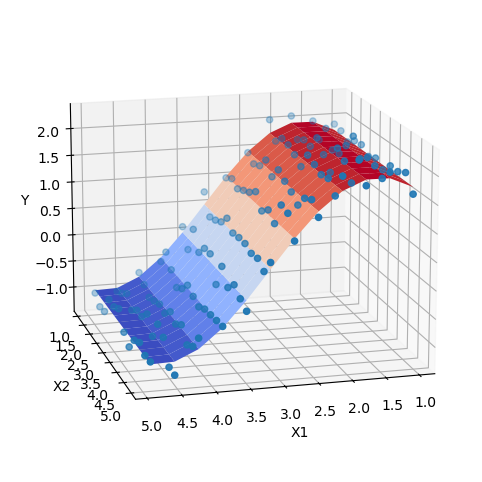

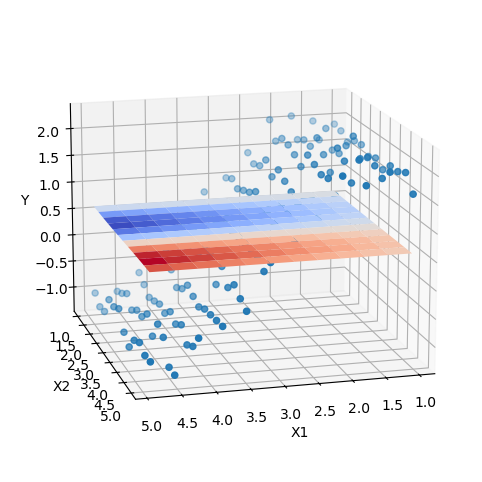

In [ ]:
z0 = (1.0, 1.0, 0.75, 0.5)
mu = 0.001
eps = np.finfo('float').eps 
tol = np.sqrt(m) * eps**(1/3)
N = 200


zk, fk, k, flag = lev_marq (eval_rc, der_r, z0, N, mu, tol)
print("c0: ", z0)

print(f"ck: {[f'{xi: .4f}' for xi in zk]}")
print(f"fk: {fk:.4f}")
print("iteraciones: ", k)
print("Convergio: ", flag) 

# y_pred = np.dot(Xn, zk)


y_pred = []
for x in X:
    y_pred.append(mod_f(x, zk))

y_pred = np.array(y_pred)

rsme = RMSE(y, y_pred, m)

print(f"RMSE: {rsme: .4f}")

graficar(y_pred, len(z0))



print("\n \n \n")

z0 = (1.0, 0.5, 0.75, 0.5)


zk, fk, k, flag = lev_marq (eval_rc, der_r, z0, N, mu, tol)

print("c0: ", z0)
print(f"ck: {[f'{xi: .4f}' for xi in zk]}")
print(f"fk: {fk:.4f}")
print("iteraciones: ", k)
print("Convergio: ", flag) 
# y_pred = np.dot(Xn, zk)


y_pred = []
for x in X:
    y_pred.append(mod_f(x, zk))

y_pred = np.array(y_pred)

rsme = RMSE(y, y_pred, m)

print(f"RMSE: {rsme: .4f}")

graficar(y_pred, len(z0))


El algoritmo aparenta ser tan eficiente como un polinomio de tercer grado utilizando el algoritmo del ejercicio anterior, comparando los valores de RMSE. 

En contraparte, para el segundo punto inicial, se ve bastante mermado el resultado, es posible que esto se deba a la implementación del algoritmo, ya que en el ejercicio 3 también existe una variación bastante notoria al cambiar el punto inicial. 

Para elegir que algoritmo utilizar entre este y el del ejericio 1 es necesario hacer una comparación entre las operaciones necesarias para resolver el sistema de ecuaciones propuesto, dependiendo del valor de $n$ y el costo del calculo del jacobiano. 

Si $n$ es bastante grande, y el jacobiano es no tan costoso, será mejor opción utilizar este segundo algoritmo. Por otro lado, si el jacobiano es costoso y $n$ no es bastante grande, sugeriré utilizar el algoritmo del ejercicio 1.

```



```

---

## Ejercicio 3. Aproximación de derivadas (2 puntos)

Repita el Ejercicio 2 aproximando las derivadas parciales
que se utilizan para calcular la matriz Jacobiana del vector
de residuales por medio del esquema forward finite differences
de orden 1.

1. Programe la función que calcula la matriz Jacobiana del
   vector residuales. Se requiere usar el incremento $h$
   del esquema de diferencias finitas para aproximar las
   derivadas parciales:
   
$$ \frac{\partial f}{\partial c_i}(\mathbf{c}) \approx
\frac{f(\mathbf{c} + h\mathbf{e}_i) - f(\mathbf{c}) }{h}.
$$

2. Repita las pruebas del Ejercicio 2 con $h=0.00001$ y
   $h=0.001$ para ver como influye la elección del parámetro $h$
   en el resultado.
   
### Solución:


In [78]:
def der_par(x, c): 

    sol = []
    for i in range(len(c)):
        e = np.zeros(len(c))
        e[i] = 1
        sol.append( (mod_f(x, c + h * e) - mod_f(x, c))/h )

    return np.array(sol)

def jacobinana (c):
    sol = []
    
    for x in X:
        sol.append(der_par(x, c))

    return np.array(sol)

        


c0:  (1.0, 1.0, 0.75, 0.5)
ck: [' 0.4784', ' 1.4885', ' 0.9950', '-0.0002']
fk: 1.4235
iteraciones:  29
Convergio:  True
RMSE:  0.1406
c0:  (1.0, 1.0, 0.75, 0.5)
ck: [' 0.4784', ' 1.4885', ' 0.9950', '-0.0008']
fk: 1.4235
iteraciones:  105
Convergio:  True
RMSE:  0.1406


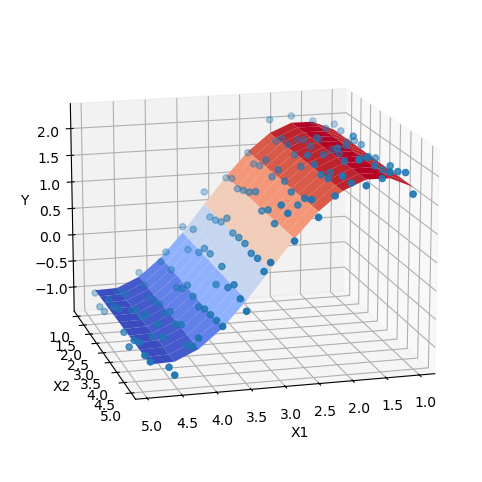

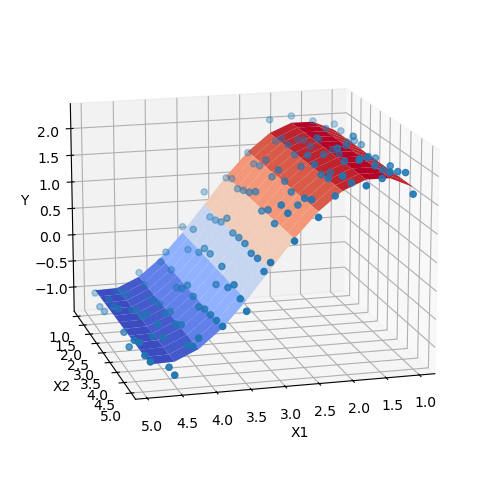

In [85]:
h = 0.00001 
z0 = (1.0, 1.0, 0.75, 0.5)
mu = 0.001
eps = np.finfo('float').eps 
tol = np.sqrt(m) * eps**(1/3)
N = 200


zk, fk, k, flag = lev_marq (eval_rc, jacobinana, z0, N, mu, tol)
print("c0: ", z0)

print(f"ck: {[f'{xi: .4f}' for xi in zk]}")
print(f"fk: {fk:.4f}")
print("iteraciones: ", k)
print("Convergio: ", flag) 

# y_pred = np.dot(Xn, zk)


y_pred = []
for x in X:
    y_pred.append(mod_f(x, zk))

y_pred = np.array(y_pred)

rsme = RMSE(y, y_pred, m)

print(f"RMSE: {rsme: .4f}")
graficar(y_pred, len(z0))


h = 0.001

zk, fk, k, flag = lev_marq (eval_rc, jacobinana, z0, N, mu, tol)
print("c0: ", z0)

print(f"ck: {[f'{xi: .4f}' for xi in zk]}")

print(f"fk: {fk:.4f}")
print("iteraciones: ", k)
print("Convergio: ", flag) 

# y_pred = np.dot(Xn, zk)


y_pred = []
for x in X:
    y_pred.append(mod_f(x, zk))

y_pred = np.array(y_pred)

rsme = RMSE(y, y_pred, m)

print(f"RMSE: {rsme: .4f}")

graficar(y_pred, len(z0))


c0:  (1.0, 0.5, 0.75, 0.5)
ck:  [ 0.5946099   0.29507932  1.0115948  12.42181561]
fk:  93.75032120413206
iteraciones:  21
Convergio:  True
RMSE:  1.1410906162535184
c0:  (1.0, 0.5, 0.75, 0.5)
ck:  [ 0.59621032 -0.12977601  3.07365147  5.15710228]
fk:  95.42969160029085
iteraciones:  22
Convergio:  True
RMSE:  1.1512655572618218


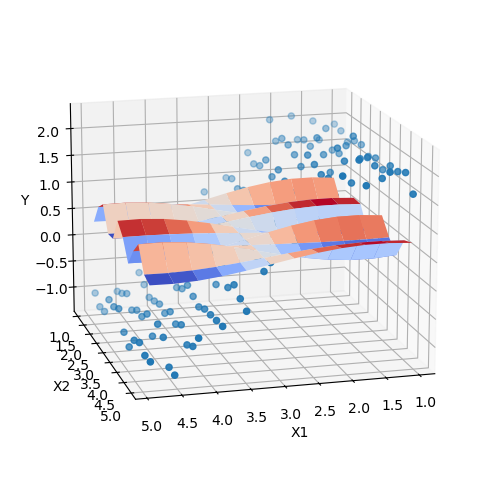

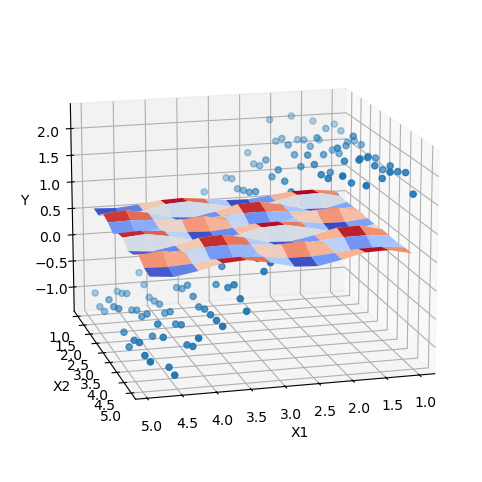

In [81]:
h = 0.00001 
z0 = (1.0, 0.5, 0.75, 0.5)
mu = 0.001
eps = np.finfo('float').eps 
tol = np.sqrt(m) * eps**(1/3)
N = 200


zk, fk, k, flag = lev_marq (eval_rc, jacobinana, z0, N, mu, tol)
print("c0: ", z0)

print(f"ck: {[f'{xi: .4f}' for xi in zk]}")
print(f"fk: {fk:.4f}")
print("iteraciones: ", k)
print("Convergio: ", flag) 
# y_pred = np.dot(Xn, zk)


y_pred = []
for x in X:
    y_pred.append(mod_f(x, zk))

y_pred = np.array(y_pred)

rsme = RMSE(y, y_pred, m)

print(f"RMSE: {rsme: .4f}")

graficar(y_pred, len(z0))


h = 0.001

zk, fk, k, flag = lev_marq (eval_rc, jacobinana, z0, N, mu, tol)
print("c0: ", z0)

print(f"ck: {[f'{xi: .4f}' for xi in zk]}")
print(f"fk: {fk:.4f}")
print("iteraciones: ", k)
print("Convergio: ", flag) 

# y_pred = np.dot(Xn, zk)


y_pred = []
for x in X:
    y_pred.append(mod_f(x, zk))

y_pred = np.array(y_pred)

rsme = RMSE(y, y_pred, m)

print(f"RMSE: {rsme: .4f}")

graficar(y_pred, len(z0))

Para el primer punto inicial es muy evidente que el cambio en el valor de $h$ provoca un aumento significativo en las iteraciones realizadas, sin embargo, obtenemos resultados similares. Lo que podria indicar que no es útil hacer este cambio de tamaño de $h$. 

Por otro lado, en el segundo caso, el aumentar el tamaño de $h$ demas de provocar una mayor cantidad de iteraciones, se ve reflejado en una menor precisión. De lo que podemos concluir que usar un tamaño de $h$ bajo es la mejor opción.

```



```
----

## Ejercicio 4. Algoritmo BFGS (3 puntos)

Programe el algoritmo BFGS modificado y realice las pruebas
para ver su desempeño.

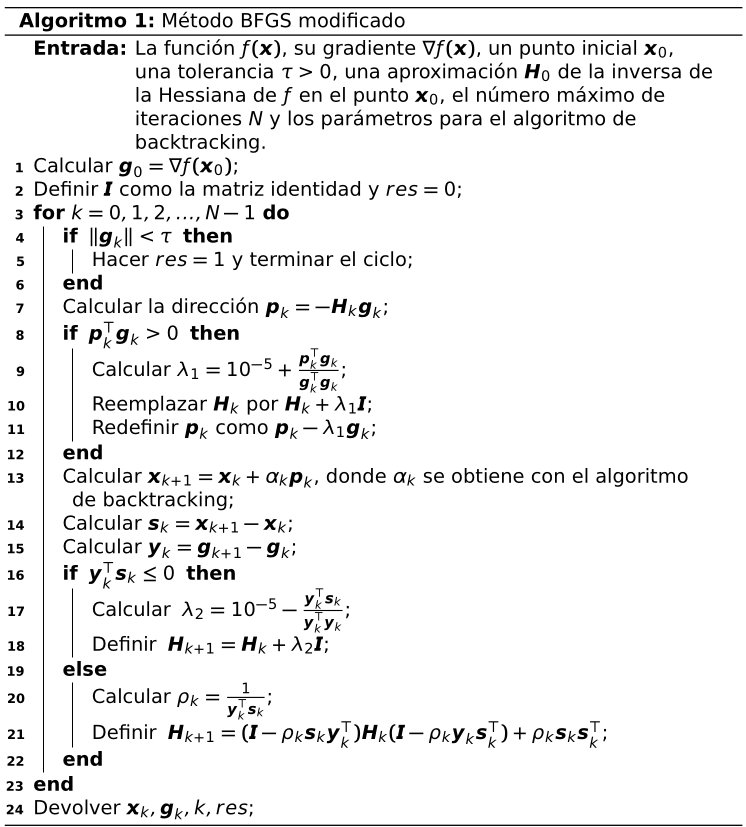

Las modificaciones que se hacen al algoritmo BFGS sirven cuando
la matriz $\mathbf{H}_k$ no es definida positiva, por lo que no
se puede garantizar que $\mathbf{p}_k$ sea una dirección de descenso.
En ese caso se puede perturbar la matriz para reemplazarla  por
$\mathbf{H}_{k} + \lambda_1\mathbf{I}$, pero la perturbación
sólo garantiza que la dirección  $\mathbf{p}_k$  resultante cumpla
con que $\mathbf{p}_{k}^\top\mathbf{g}_{k}<0$, que es indespensable
para el algoritmo de backtracking, pero no garantiza que la matriz
sea definida positiva. Por eso es que solo se aplica la fórmula
para actualizar la matriz $\mathbf{H}_{k}$ sólo si
$\mathbf{y}_{k}^\top\mathbf{s}_{k} > 0$,
y en caso contrario, se prefiere volver a perturbar la matriz.

1. Programe la función que implementa el algoritmo BFGS modificado.
   Si la dimensión de las variables es 2, almacene
   los puntos $\mathbf{x}_0, \mathbf{x}_1,...,\mathbf{x}_k$ que genera el algoritmo
   y haga que la función devuelva esta lista para usarlos para graficar la trayectoria.
2. Pruebe el algoritmo con las funciones siguientes
   usando

- los puntos iniciales $\mathbf{x_0}$ indicados,
- definir $\mathbf{H}_{0}$ como la matriz identidad,
- el número de iteraciones máximas $N=10000$ y la tolerancia
- $\tau = \sqrt{n\epsilon_m}$, donde $\epsilon_m$ es el épsilon de máquina.
- Para el algoritmo del backtraking use $\alpha_{ini}=1$, $c_1=0.1$, $\rho=0.6$ y el máximo de iteraciones $N_b=100$.

  Una vez que se haya ejecutado el algoritmo imprima los valores siguientes:
  
- $f(\mathbf{x}_0)$,
- el número de iteraciones $k$,
- la norma $\|\mathbf{g}_k\|$.
- Sea $n$ la dimensión de la variable $\mathbf{x}$. Si $n<=6$, imprimir
  el vector $\mathbf{x}_k$. En caso contrario, imprimir las primeras y
  las últimas 3 componentes de  $\mathbf{x}_k$.
- $f(\mathbf{x}_k)$.

   Además, si $n=2$, grafique los contornos de nivel de la función
   y la trayectoria  definida por los puntos $\mathbf{x}_0, \mathbf{x}_1,...,\mathbf{x}_k$.
   
3. Escriba un comentario sobre el desempeño del algoritmo BFGS comparado
   con el método de Newton implementado en el Ejercicio 3 de la Tarea 6.

### Funciones de prueba


**Función de Beale :** Para $\mathbf{x}=(x_1,x_2)$

$$f(\mathbf{x}) = (1.5-x_1 + x_1x_2)^2 + (2.25 - x_1 + x_1x_2^2)^2 + (2.625 - x_1 + x_1x_2^3)^2.$$
- $\mathbf{x}_0 = (2,3)$  
   
---

**Función de Himmelblau:** Para $\mathbf{x}=(x_1,x_2)$

$$f(\mathbf{x}) = (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2. $$
- $\mathbf{x}_0 = (2,4)$

---

**Función de Hartmann de dimensión 6 ([Referencia](https://www.sfu.ca/~ssurjano/hart6.html)):**
Para $\mathbf{x}=(x_1,x_2, ..., x_6)$

$$ f(\mathbf{x}) = -\frac{1}{1.94} \left[ 2.58 +
\sum_{i=1}^{4} \alpha_i \exp\left(-\sum_{i=1}^{6}a_{ij}(x_j-p_{ij})^2 \right)\right],$$
donde
$$ \alpha = (1.0, 1.2, 3.0, 3.2)$$

$$ \mathbf{A} = [a_{ij}] = \begin{bmatrix}
10   &   3 &   17 & 3.5 & 1.7 &  8 \\
0.05 &  10 &   17 & 0.1 & 8   & 14 \\
3    & 3.5 & 1.7  & 10  & 17  & 8  \\
17   & 8   & 0.05 & 10  & 0.1 & 14
\end{bmatrix},$$

$$
\mathbf{P} = [p_{ij}] = 10^{-4} \begin{bmatrix}
1312 & 1696 & 5569 &  124 & 8283 & 5886 \\
2329 & 4135 & 8307 & 3736 & 1004 & 9991 \\
2348 & 1451 & 3522 & 2883 & 3047 & 6650 \\
4047 & 8828 & 8732 & 5743 & 1091 & 381
\end{bmatrix}.
$$

Esta función tiene 6 óptimos locales. El óptimo global es
$\mathbf{x}_* = (0.20169, 0.15001,  0.476874, 0.275332, 0.311652, 0.6573)$,
y $f(\mathbf{x}_*) = -3.0424$.

---

**Función de Rosenbrock:** Para $\mathbf{x}=(x_1,x_2, ..., x_n)$

$$ f(\mathbf{x}) = \sum_{i=1}^{n-1} \left[100(x_{i+1} - x_i^2)^2 + (1-x_i)^2 \right]
\quad n\geq 2.$$
- $\mathbf{x}_0 = (-1.2, 1.0)\in \mathbb{R}^{2}$  
- $\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{200}$  
- $\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{600}$


### Solución:

In [109]:

def BFGS_mod (f, grad, x0, tol, H0, N):
    xk = x0
    I = np.eye(len(x0))
    flag = False

    trayectoria = []

    Hk = H0

    for k in range(N):
        gk = grad(xk)

        if np.linalg.norm(gk) < tol:
            flag = True 
            break
        
        pk = np.dot(-Hk, gk)

        if np.dot(pk.T, gk) > 0:
            l1 = 0.00001 + ( np.dot(pk.T, gk) / np.dot(gk.T, gk))
            Hk  = Hk + l1 * I
            pk = pk - l1 * gk

        alpha, _= back_suficiente(xk, f, f(xk), gk, pk)

        xk1 =  xk + alpha * pk 

        if len(x0) == 2: 
            trayectoria.append(xk1)

        sk = xk1 - xk
        yk = grad(xk1) - grad(xk)

        if np.dot(yk.T, sk) < 0:
            l2 = 0.000001 - ( np.dot(yk.T, sk) / np.dot(yk.T, yk)) 
            Hk1 = Hk + l2 * I 
        else: 
            rhok = 1 / (np.dot(yk.T, sk) + 1e-10)

            Hk1 = np.dot((I - rhok * np.dot(sk, yk.T)), np.dot( Hk, I - rhok * np.dot(yk, sk.T))) + rhok * np.dot(sk, sk.T)

        Hk = Hk1
        xk = xk1

    return xk, gk, k, flag, trayectoria   




In [112]:
N = 10000
tol = np.sqrt(n * eps) 


def prueba_funcion (f, grad_f, x0):
    n = len(x0)

    xk, gk, k, flag, sec = BFGS_mod (f, grad_f, x0, tol, np.eye(n), N)



    print(f"f(x0): {f(x0):.4f}")
    print("k:", k)
    print("Se cumplio la condicion de convergencia: ", flag)
    print(f"||gk||: {np.linalg.norm(gk):0.4f}")
    if len(xk) <= 6:
        print(f"xk: {[f'{xi: .4f}' for xi in xk]}") 
    else:
        print(f"xk: {[f'{xi: .4f}' for xi in xk[:3]]}  ...  {[f'{xi: .4f}' for xi in xk[-3:]]}")

    print(f"f(xk): {f(xk):.4f}")

    if len(x0) == 2:
        xl = -4.5
        xr = 4.5 
        ybottom = -4.5 
        ytop = 4.5 
        print("Contornos: ")
        contornos = [f(x) for x in sec]
        contornos.sort()
        plot2DFnc(f, xl, xr, ybottom, ytop, contornos)
        trayectorias2D(sec) 



Resultados Beale
f(x0): 3347.2031
k: 9999
Se cumplio la condicion de convergencia:  False
||gk||: 0.0000
xk: [' 3.0000', ' 0.5000']
f(xk): 0.0000
Contornos: 


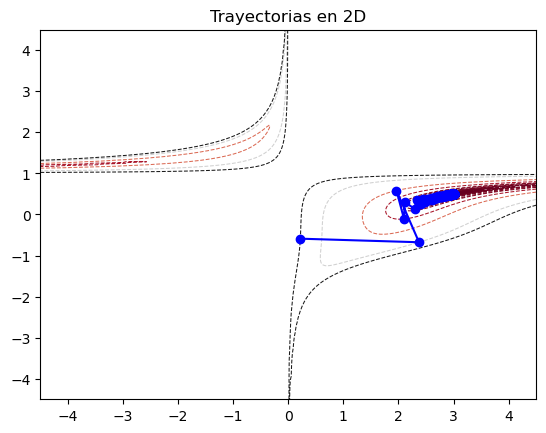


 
 
 
Resultados Himmenlblau
f(x0): 130.0000
k: 102
Se cumplio la condicion de convergencia:  True
||gk||: 0.0000
xk: [' 3.0000', ' 2.0000']
f(xk): 0.0000
Contornos: 


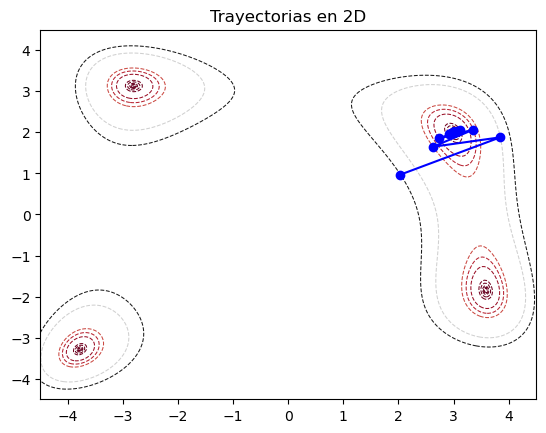


Resultados Hartman
f(x0): -1.3300
k: 9999
Se cumplio la condicion de convergencia:  False
||gk||: 0.8315
xk: [' 0.1315', ' 0.0673', ' 0.6956', ' 0.0012', ' 0.3955', ' 0.0856']
f(xk): -1.4751

Resultados Rosenbrock n=2
f(x0): 24.2000
k: 9999
Se cumplio la condicion de convergencia:  False
||gk||: 0.0013
xk: [' 0.9986', ' 0.9972']
f(xk): 0.0000
Contornos: 


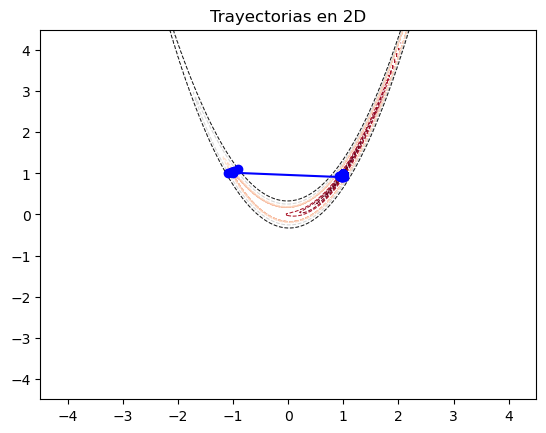


Resultados Rosenbrock n=200


d:\Documentos\Demat\Demat 6\Optimizacion\Tarea 8\funciones_prop.py:406: RuntimeWarning: overflow encountered in scalar power
  t_sum += 100 * (x[i + 1] - x[i]**2)**2 + (1 - x[i])**2
d:\Documentos\Demat\Demat 6\Optimizacion\Tarea 8\funciones_prop.py:406: RuntimeWarning: overflow encountered in scalar multiply
  t_sum += 100 * (x[i + 1] - x[i]**2)**2 + (1 - x[i])**2
d:\Documentos\Demat\Demat 6\Optimizacion\Tarea 8\funciones_prop.py:406: RuntimeWarning: overflow encountered in scalar add
  t_sum += 100 * (x[i + 1] - x[i]**2)**2 + (1 - x[i])**2
d:\Documentos\Demat\Demat 6\Optimizacion\Tarea 8\funciones_prop.py:318: RuntimeWarning: overflow encountered in matmul
  if f(xk + a * pk) <= f(xk) + c1 * a * grad_xk.T @ pk:
d:\Documentos\Demat\Demat 6\Optimizacion\Tarea 8\funciones_prop.py:413: RuntimeWarning: overflow encountered in scalar power
  grad[0] = -400. * x[0] * (x[1] - x[0]**2) + 2. * (x[0] - 1.)
d:\Documentos\Demat\Demat 6\Optimizacion\Tarea 8\funciones_prop.py:416: RuntimeWarning: ov

In [ ]:
x0 = [2., 3.]
print("Resultados Beale")
prueba_funcion(fun_Beale, grad_fun_Beale, x0)


print("\n \n \n ")

x0 = [2., 4.]
print("Resultados Himmenlblau")
prueba_funcion(fun_Himmenlblau, grad_Himmenlblau, x0)


print()
x0 = np.zeros(6)
print("Resultados Hartman")
prueba_funcion(fun_Hartman, grad_fun_Hartman, x0) 

print()
x0 = [-1.2, 1.0]
print("Resultados Rosenbrock n=2")
prueba_funcion(fun_Rosenbrock, grad_fun_Rosenbrock, x0)

print()
x0 = np.zeros(200)
for i in range(100):
    x0[2 * i] = -1.2
    x0[2 * i + 1] = 1.0

print("Resultados Rosenbrock n=200")
prueba_funcion(fun_Rosenbrock, grad_fun_Rosenbrock, x0)


print()

x0 = np.zeros(600)
for i in range(100):
    x0[2 * i] = -1.2
    x0[2 * i + 1] = 1.0

print("Resultados Rosenbrock n=600")
prueba_funcion(fun_Rosenbrock, grad_fun_Rosenbrock, x0)


La implementacion presentada en el ejercicio 3 de la tarea 6 parece ser mas eficiente en iteraciones, pues  para la funcion Beale tardó 9 iteraciones en converger, mientras que la implementacion actual no converge, a pesar de llegar al mínimo, no se cumple la condición de paro. 

Si bien en la funcion Himmenlblau sí se cumple la condición de paro, en la implementación de la tarea 6 se utilizan 6 iteracion y en la actual 120. 

En general podemos observar que el algoritmo actual es efectivo encontrando los puntos óptimos, sin embargo, no se cumple la condición de paro, lo que provoca un costo computacional mayor en comparacion con la implementación de la tarea 6.

Interpreto que esto se debe a que en el metodo de newton se aprovecha la factorización de Choelsky para matrices positivas definidas, mientras que en este caso, se perturba la matriz Hessiana, lo que se traduce en una menor precisión en los cálculos de dirección y tamaño de paso .

Esta misma perturbación ocasiona que en la función Rosenbrock se tenga el error overflow en algunas iteraciones, lo que memra el resultado obtenido.